# Convolution and DCT

## William Koehrsen wjk68

Convolution in the spatial domain is equivalent to multiplication in the frequency domain. This notebook attemps to show that convolving a 2D image with a kernel is the same as multiplying the transforms of the kernel and the image. 

In [131]:
import numpy as np
import pandas as pd

import scipy
from scipy import ndimage
from scipy import fftpack

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(10, 8)

# Sharpen Filter

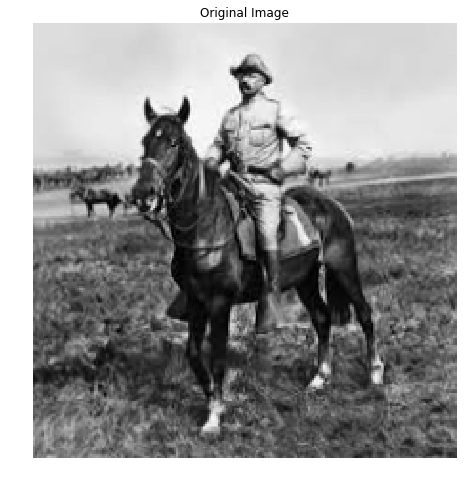

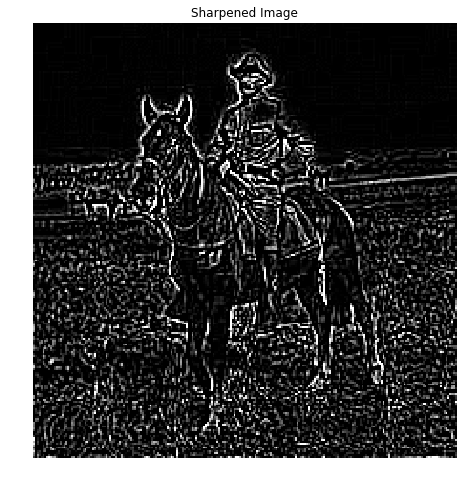

In [132]:
img = cv2.imread('img/ex.jpg')[:, :, 0]
img = cv2.resize(img, (222, 228))

sharpen_kernel = np.array([[-1, -1, -1], 
                           [-1,  8, -1],
                           [-1, -1, -1]])

filtered = cv2.filter2D(img, -1, sharpen_kernel)
plt.imshow(img, cmap = 'gray'); plt.axis('off'); plt.title('Original Image'); plt.show();
plt.imshow(filtered, cmap = 'gray'); plt.axis('off'); plt.title('Sharpened Image'); plt.show();

# Discrete Cosine Transform and Inverse Cosine Transform

In [133]:
def get_2D_dct(img):
    return fftpack.dct(fftpack.dct(img.T, norm = 'ortho').T, norm = 'ortho')

def get_2D_idct(coefficients):
    return fftpack.idct(fftpack.idct(coefficients.T, norm = 'ortho').T, norm = 'ortho')

def get_reconstructed_image(raw):
    img = raw.clip(0, 255)
    img = img.astype('uint8')
    return img

In [134]:
kernel_transforms = get_2D_dct(sharpen_kernel)
img_transforms = get_2D_dct(img)

# Multiply the Kernel and Image Transforms

In [135]:
start_height = 0
stop_height = start_height + 3

product = np.zeros(img_transforms.shape)

for i in range(int(img.shape[0] / 3) - 1):
    start_width = 0
    stop_width = start_width + 3
    
    for j in range(int(img.shape[1] / 3)):
        
        patch = img_transforms[start_height:stop_height, start_width:stop_width]
        m = kernel_transforms * patch
        
        product[start_height:stop_height, start_width:stop_width] = m
        
        start_width = stop_width
        stop_width += 3
    
    start_height = stop_height
    stop_height += 3
        

# Visualize Reconstruction

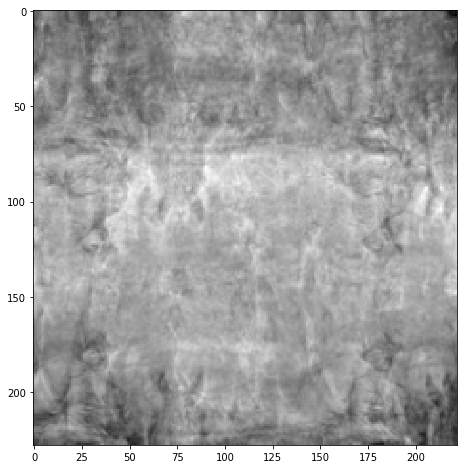

In [136]:
inv = get_2D_idct(product)
inv_img = get_reconstructed_image(inv)
plt.imshow(inv, cmap = 'gray');

# Conclusions

Unfortunately, I was never able to recover the image from the transformations. I think the problem is in the multiplication of the transformed kernel and the transformed image. My code tries to multiply the two transforms element by element, but this implementation does not appear to be correct. The transforms themselves are right, but it is the mutliplication of the two different-sized arrays with which I am having difficulty. 